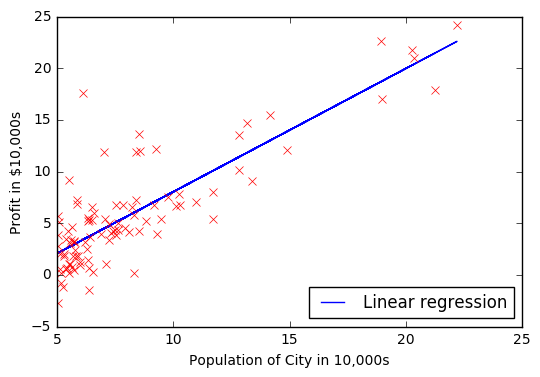

For population = 35,000, we predict a profit of 2799.632412
For population = 70,000, we predict a profit of 44555.124696


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compute_cost(X, y, theta):
    m = len(y)
    s = np.power(( X.dot(theta) - np.transpose([y]) ), 2)
    J = (1.0/(2*m)) * s.sum( axis = 0 )
    return J

def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    for i in np.arange(iters):
        h = X.dot(theta) - np.transpose([y])
        theta = theta - alpha*((1.0/m) * np.transpose(X).dot(h))
    return theta

def plotData(X, y):
    plt.plot(X,y,'rx', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()
    
# load labeled training data into algorithm
data = np.loadtxt('ex1data1.txt', delimiter=',')

X = data[:, 0]
y = data[:, 1]

# Initial theta parameters 
theta = np.zeros(shape=(2, 1))

# Plot data
plotData(X, y)

# Length of training set 
m = len(y)

# X subscript 0 to 1 
X_padded = np.column_stack((np.ones((m,1)), X))

# Compute square error cost
compute_cost(X_padded, y, theta)

# Number of iterations to converge
iters = 5500

# set alpha value 
alpha = 0.01

theta = gradient_descent(X_padded, y, theta, alpha, iters)

# # Plot the linear fit
plt.plot(X,X_padded.dot(theta),'-', label='Linear regression')
plt.legend(loc='lower right')
plt.draw()
plt.hold(True) # do not prevent further plotting on the same figure


# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {:f}'.format( float(predict2*10000) ))
